# Decision Tree 과제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# sklearn 패키지로부터 import tree 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
X = diabetes.drop('Outcome', axis=1)
Y = diabetes['Outcome'] # class는 0 또는 1

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0) # random_state: 추정기의 무작위성 제어

In [7]:
# classification tree 구축
clf = tree.DecisionTreeClassifier() # tree 객체에서 DecisionTreeClassifier()를 불러와서 clf에 저장

In [8]:
clf = clf.fit(X_train, y_train) # X,Y 데이터셋을 classification tree에 적합시키기

In [9]:
from sklearn.tree import export_graphviz # export_graphviz: 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듦

In [10]:
# 트리 시각화를 위한 모듈 import
#!pip install pydot

import pydot
from IPython.core.display import Image 

In [11]:
dot_data = export_graphviz(clf, out_file = None, # out_file: 파일로 내보내고자 하는 것이 아니라 직접 그리기 때문에 None
                                feature_names = X.columns,
                                class_names = ['no','yes'],
                                filled = True, # 색 넣어줌
                                rounded = True, # 반올림
                                special_characters = True) # 특수문자를 대비해서 넣어주는 옵션

In [16]:
#!pip install graphviz

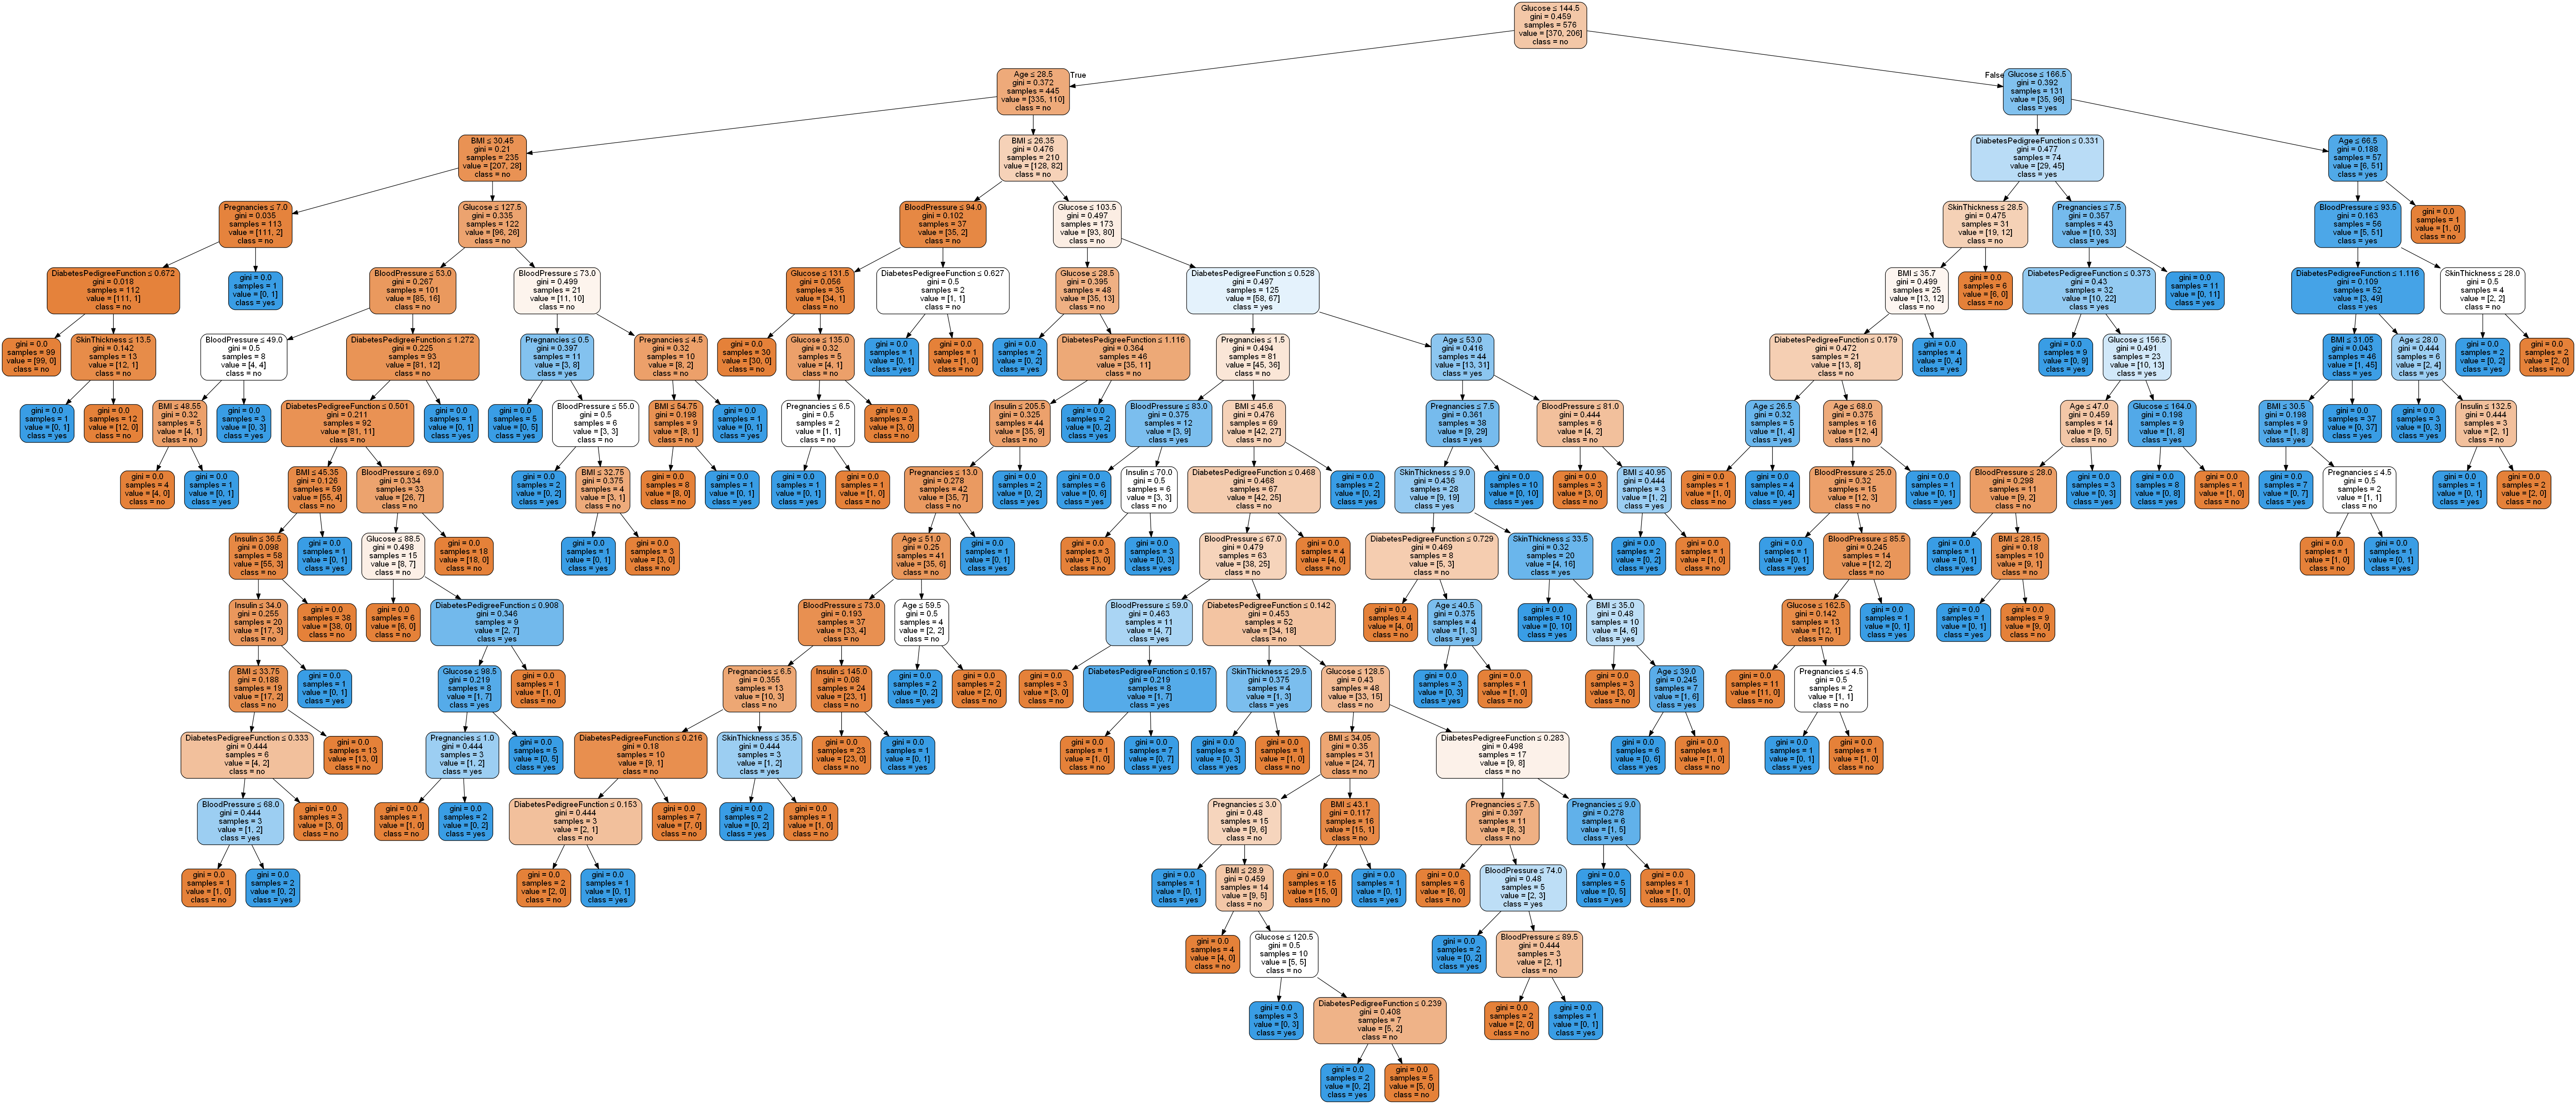

In [12]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)
# 같은 색 계열이면 같은 집단으로 분류된 것

과도하게 분류 하고 있음을 알 수 있다.

In [16]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.7291666666666666


In [17]:
# 함수로 만듦
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = ['no','yes'],
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

### Pruning 과정

1. max_depth

In [18]:
feature_names = X.columns
class_names = ['no','yes']

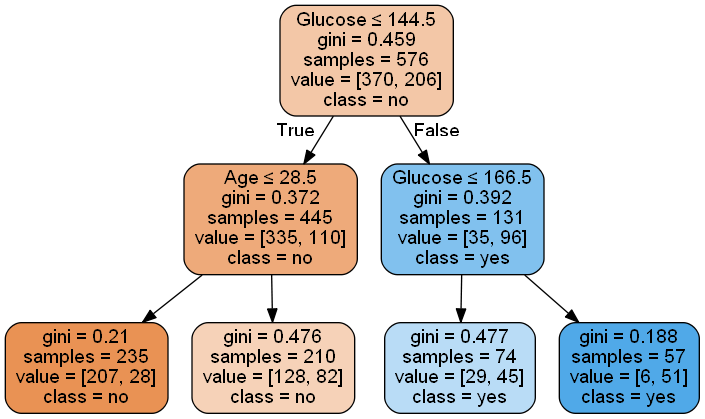

In [19]:
# 트리의 최대 depth를 결정
clf = tree.DecisionTreeClassifier(max_depth = 2)
tree_max2 = clf.fit(X_train, y_train)
draw_decision_tree(tree_max2, feature_names, class_names)

# max_depth 값을 입력하지 않을 경우, 모든 leaf가 pure해질때까지 혹은,
# 분기된 노드 속 샘플수가 설정한 최소 샘플수(min_samples_split)보다 적게 될때까지 분기함

In [20]:
y_pred = tree_max2.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score) #0.729보다는 증가했다.

0.75


2. min_samples_split

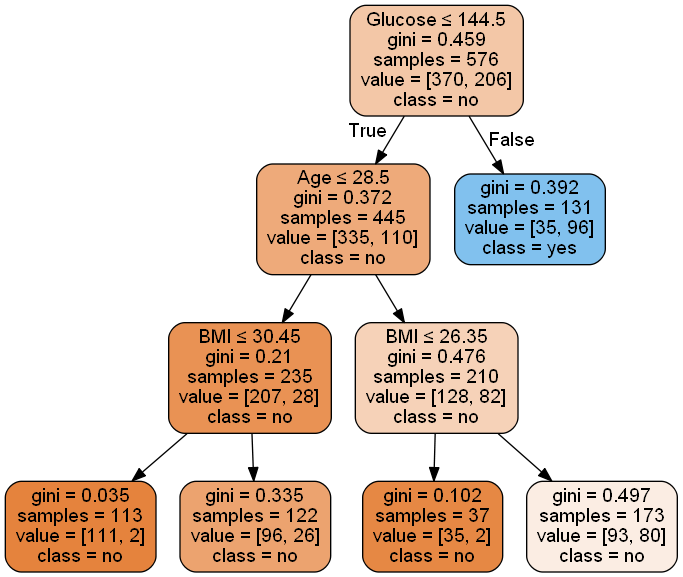

In [21]:
# split하기 위해 노드가 가지고 있어야 하는 최소 샘플 개수를 설정
clf = tree.DecisionTreeClassifier(min_samples_split = 200)
tree_minsample200 = clf.fit(X_train, y_train)
draw_decision_tree(tree_minsample200, feature_names, class_names)

# 최소 개수보다 node 내 샘플 수가 적으면 leaf가 pure하지 않더라도 분기를 멈춤
# float 입력 시, 전체 샘플 개수 대비 float 비율만큼의 개수로 최소 샘플수가 설정됨

In [22]:
y_pred = tree_minsample200.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score) #0.729보다는 증가했다.

0.75


3. min_samples_leaf

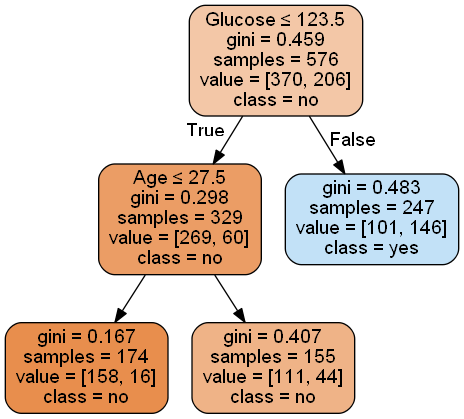

In [23]:
# leaf node가 가져야 하는 최소 샘플 개수를 설정
clf = tree.DecisionTreeClassifier(min_samples_leaf = 150)
tree_minleaf150 = clf.fit(X_train, y_train)
draw_decision_tree(tree_minleaf150, feature_names, class_names)

# 왼쪽 혹은 오른쪽 branch에 각각 min_samples_leaf만큼 훈련 샘플이 있어야 분기가 됨

In [24]:
y_pred = tree_minleaf150.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score) #기존의 것보다는 조금 정확도가 떨어졌다.

0.7239583333333334


4. max_leaf_nodes

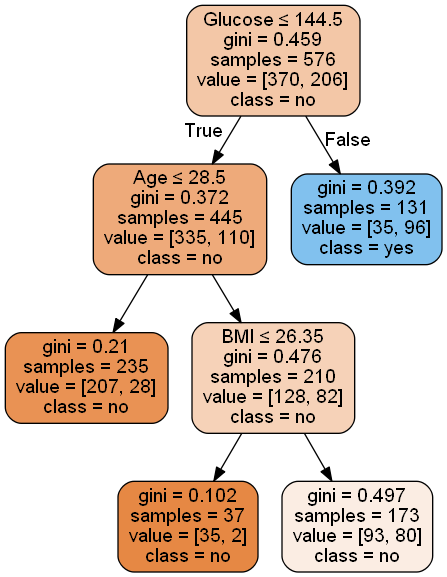

In [25]:
# leaf node의 최대 개수를 설정
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 4)
tree_ln4 = clf.fit(X_train, y_train)
draw_decision_tree(tree_ln4, feature_names, class_names)

In [27]:
y_pred = tree_ln4.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.75


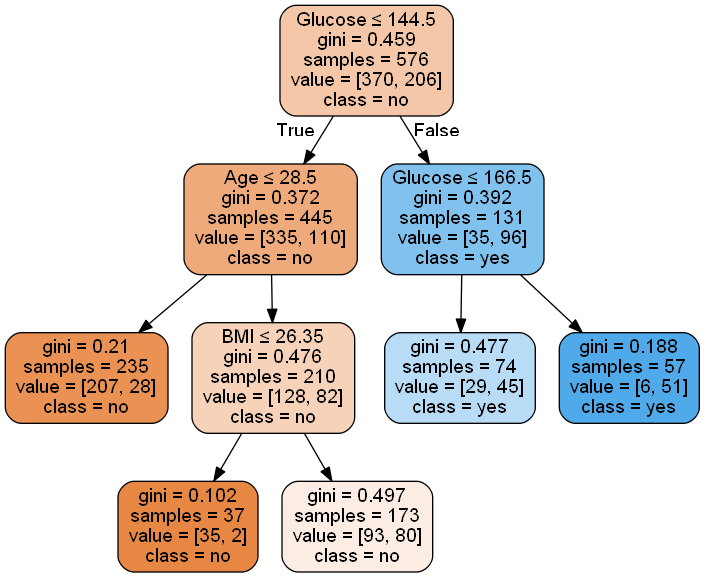

In [28]:
# leaf node의 최대 개수를 설정
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 5)
tree_ln5 = clf.fit(X_train, y_train)
draw_decision_tree(tree_ln5, feature_names, class_names)

In [29]:
y_pred = tree_ln5.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.75


정답과 함께 꼭 비교확인하기